# Customer Segmentation Using Machine Learning

## Project Description

Using a dataset from the UCI Machine Learning Repository, customers of an e-commerce company are segmented using an RFM analysis. An RFM analysis classifies customers based on the recency of their last purchase, frequency of purchase, and the monetary value of each purchase. Multiple machine learning models are constructed and evaluated to determine the most effective model for the segmentation of this dataset.

## Why Is This Project Important?

Classifying customers based on their habits is critical in order for marketing teams to be able to push appropriate offers to each customer. It empowers marketers to quickly categorize customers and push tailored or even personalized content to them in real time. The successful use of RFM analysis has been proven to increase customer retention, engagement, and money spent.

## The Dataset

#### Overview
The dataset was taken from the UCI Machine Learning Repository and is titled "Online Retail". It contains e-commerce transactions for a UK-based company between 2010 and 2011. Along with the dataset, UCI provided some details regarding the attributes in the dataset.

#### Attributes
*InvoiceNo:* Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

*StockCode:* Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

*Description:* Product (item) name. Nominal.

*Quantity:* The quantities of each product (item) per transaction. Numeric.

*InvoiceDate:* Invoice date and time. Numeric. The day and time when a transaction was generated.

*UnitPrice:* Unit price. Numeric. Product price per unit in sterling (£).

*CustomerID:* Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

*Country:* Country name. Nominal. The name of the country where a customer resides.

#### Importing the Dataset
The dataset, along with the Python libraries I will use for this project, is imported below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('data.csv', encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


## Processing the Data

#### Cleaning the Data
Before performing exploratory analysis, I clean the dataset to ensure all of our rows are usable.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [4]:
#Change dtype of InvoiceDate to datetime and drop the time
df_raw['InvoiceDate'] = pd.DatetimeIndex(df_raw['InvoiceDate']).date

In [5]:
df_raw.shape

(541909, 8)

The raw dataset contains 541,909 rows of data. However, some of these rows are likely unusable due to missing data. First, we know we cannot use any rows with a missing 'CustomerID', as we do not know which customer made those purchases. Therefore, I begin by removing all rows without a 'CustomerID' from the dataset.

In [6]:
df_raw.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
df_raw.shape

(406829, 8)

After dropping these rows, we are left with 406,829 observations. This means that 135,080 rows had a missing 'CustomerID'. In addition to dropping these rows, we also want to drop any duplicate rows. If two rows have the exact same values for every attribute, we can assume it is due to the transaction accidentally being entered into the dataset twice (since there is a 'Quantity' attribute, we know that duplicate rows do NOT just indicate that a customer purchased multiple of the same item).

In [7]:
df_raw.drop_duplicates(inplace = True)
df_raw.shape

(401603, 8)

After dropping these rows, we are left with 401,604 observations. This means that 5,225 remaining rows were duplicates. Now, I decide to remove the cancelled orders from the dataset as we cannot rely on them to classify customers. Upon examination of the dataset, we see that cancelled orders have a negative quantity. Therefore I only select rows where the quantity is greater than 0.

In [8]:
df_raw = df_raw[df_raw['Quantity'] > 0]

In [9]:
df_clean = df_raw

#### Exploratory Analysis

As the company is based in the UK, it is hypothesized that the large majority of the customers are located in the UK. That hypothesis is tested below:

In [10]:
customers_per_country = df_clean[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', \
                'InvoiceNo', 'Country']).count().reset_index(drop = False)
countries = customers_per_country['Country'].value_counts()
print(countries)

United Kingdom          16649
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                95
Spain                      90
Australia                  57
Portugal                   57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Greece                      5
Israel                      5
Malta                       5
USA                         5
European Community          4
Lithuania                   4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Lebanon   

In [11]:
for i in range(len(countries)):
    print(countries.index[i],': {:.2f}%'.format(countries[i]/countries.sum()*100))

United Kingdom : 89.82%
Germany : 2.47%
France : 2.10%
EIRE : 1.40%
Belgium : 0.53%
Netherlands : 0.51%
Spain : 0.49%
Australia : 0.31%
Portugal : 0.31%
Switzerland : 0.28%
Finland : 0.22%
Italy : 0.21%
Norway : 0.19%
Sweden : 0.19%
Channel Islands : 0.14%
Poland : 0.10%
Japan : 0.10%
Denmark : 0.10%
Austria : 0.09%
Cyprus : 0.09%
Unspecified : 0.04%
Iceland : 0.04%
Singapore : 0.04%
Canada : 0.03%
Greece : 0.03%
Israel : 0.03%
Malta : 0.03%
USA : 0.03%
European Community : 0.02%
Lithuania : 0.02%
United Arab Emirates : 0.02%
Czech Republic : 0.01%
Bahrain : 0.01%
Lebanon : 0.01%
Saudi Arabia : 0.01%
RSA : 0.01%
Brazil : 0.01%


89.82% of all customers are from the United Kingdom. The remaining 10.18% of customers are spread among 36 other countries/territories. Because the percentage of customers for each country other than the UK is so low, I decided to remove international customers from the data and instead focus on segmenting the domestic customers.

In [12]:
df_clean = df_clean[df_clean['Country']=='United Kingdom']
df_clean.shape

(349226, 8)

In [13]:
#Find range of dates
first_order = df_clean['InvoiceDate'].min()
last_order = df_clean['InvoiceDate'].max()
print('Time of Data Collection:', first_order, 'to', last_order)

Time of Data Collection: 2010-12-01 to 2011-12-09


#### Feature Engineering
The attributes in the dataset do not explicitly allow us to perform an RFM analysis. However, the dataset contains enough information to figure out a customer's most recent purchase, frequency of purchase, and monetary value of each purchase. These values will be found for each customer and then a dataframe will be created containing these values.

First, a column containing the most recent purchase date for each customer is created:

In [14]:
most_recent_purchase_df = df_clean.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
most_recent_purchase_df.columns = ['CustomerID','Most Recent Purchase Date']
most_recent_purchase_df.head()

,CustomerID,Most Recent Purchase Date
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


However, this column alone is not enough to determine recency. We must find the difference between this date and the current date. I will assume that the current date is the last date that data is recorded, which I have previously named "last_order". My subtracting the most recent purchase date of a customer by "last order", we find the number of days since the customer's last purchase.

In [15]:
most_recent_purchase_df['Recency'] = most_recent_purchase_df['Most Recent \
Purchase Date'].apply(lambda date_of_purchase: (last_order - date_of_purchase).days)

In [16]:
most_recent_purchase_df.head()

,CustomerID,Most Recent Purchase Date,Recency
0,12346,2011-01-18,325
1,12747,2011-12-07,2
2,12748,2011-12-09,0
3,12749,2011-12-06,3
4,12820,2011-12-06,3


Next, we need a column that contains the frequency that customers make purchases. This value will be found by counting the total number of invoices for each customer. Since each invoice is broken down into multiple rows, we cannot simply count the number of transactions per customer. Instead, I will create a dataframe that contains only unique invoice numbers so that it is easier to find the total number of invoices for each customer.

In [17]:
#Create a dataframe with only one row per invoice
df_clean_copy = df_clean
df_clean_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#Create a dataframe with a column containing number of invoices per customer
number_of_orders_per_customer_df = df_clean_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
number_of_orders_per_customer_df.columns = ['CustomerID','Frequency']
number_of_orders_per_customer_df.head()

,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4


Lastly, we need a column that contains the monetary value of each order per customer. For this value, I first create a new column on our main dataframe for the total cost of each transaction (quantity times unit cost).

In [18]:
df_clean['TotalCost'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [19]:
money_spent_per_customer_df = df_clean.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
money_spent_per_customer_df.columns = ['CustomerID','Money Spent per Customer']
money_spent_per_customer_df.head()

,CustomerID,Money Spent per Customer
0,12346,77183.60
1,12747,689.49
2,12748,3841.31
3,12749,98.35
4,12820,58.20


Now we have an attribute for defining recency, defining frequency, and defining monetary value. These three attributes are put into a new dataframe with each customer as one observation. This will be the dataframe used in the model building.

In [20]:
#Import each column into a new dataframe
RFM_DataFrame = pd.DataFrame(columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary Value'])
RFM_DataFrame['CustomerID'] = most_recent_purchase_df['CustomerID']
RFM_DataFrame['Recency'] = most_recent_purchase_df['Recency']
RFM_DataFrame['Frequency'] = number_of_orders_per_customer_df['Frequency']
RFM_DataFrame['Monetary Value'] = money_spent_per_customer_df['Money Spent per Customer']

#Check that the CustomerID Column from each three dataframes were in same order
for i in range(len(RFM_DataFrame['CustomerID'])):
    
    x = RFM_DataFrame['CustomerID'][0] == number_of_orders_per_customer_df['CustomerID'][0]
    y = RFM_DataFrame['CustomerID'][0] == most_recent_purchase_df['CustomerID'][0]
    z = RFM_DataFrame['CustomerID'][0] == money_spent_per_customer_df['CustomerID'][0]
    if x != True or y != True or z != True:
        print('CustomerID Columns are not the same.')

Basic exploratory analysis is now performed on the new dataframe to ensure all of the values are the correct datatype and to look at the distribution of the data.

In [21]:
RFM_DataFrame.head()

,CustomerID,Recency,Frequency,Monetary Value
0,12346,325,1,77183.60
1,12747,2,11,689.49
2,12748,0,210,3841.31
3,12749,3,5,98.35
4,12820,3,4,58.20


In [22]:
RFM_DataFrame.shape

(3921, 4)

In [23]:
RFM_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
CustomerID        3921 non-null object
Recency           3921 non-null int64
Frequency         3921 non-null int64
Monetary Value    3921 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 313.2+ KB


In [24]:
RFM_DataFrame.describe()

,Recency,Frequency,Monetary Value
count,3921.000000,3921.000000,3921.000000
mean,91.722265,4.246111,293.299913
std,99.528532,7.205750,3261.756525
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,17.700000
50%,50.000000,2.000000,45.400000
75%,142.000000,5.000000,124.500000
max,373.000000,210.000000,168471.250000


From the table above, the mean amount of time since a customer's most recent purchase is 92 days. The median amount of time is 50 days, so it is clear that the 'Recency' values are not symetrically distributed. 25% of customers haven't placed an order in at least 142 days, and one customer hasn't placed an order in 373 days.

The mean number of orders per customer is about 4. The median customer placed 2 orders, and at least 25% of customers have only made 1 order. The top 25% made at least 5 orders, with one superstar customer making a whopping 210 orders.

The mean amount of money spent per customer is 293 sterling, with the median customer spending 45 sterling. This data is highly dispersed, as the coefficient of variation (standard deviation/mean) is over 11. The highest-spending customer spent 168,471 sterling.

When building a model using the RFM DataFrame above, the clusters created are extremely disproportionate. Regardless of the value of k, the KMeans algorithm would result in over 90% of the customers being placed in one cluster. This analysis is futile for a marketing team, as it fails to segment the bulk of the customers into meaningful clusters. This extreme unevenness in cluster size is caused by extreme outliers in the data. One solution to creating better segmentations is to eliminate the outliers from the data. This method has a large downside, however, as eliminating customers from the dataset means we fail to classify them for our marketing team. The alternative solution is to transform the columns we have into a grading scale. For each of the three RFM features, a customer can be graded for how "well" they perform. For example, a customer who shops with very high frequency should receive an 'A' grade for frequency, and customers with very low frequency receive closer to an 'F'. In this case, I decided to determine grade based on the quartile a customer is in. The grading scale is 1-4, with 1 being the worst and 4 being the best. For example, the 75% percentile and above for 'Monetary Value' receive a grade of a 4 for monetary value.

In [25]:
RFM_DataFrame_Grades = pd.DataFrame(columns = ['CustomerID', 'Recency Grade', 'Frequency Grade', 'Monetary Value Grade'])
RFM_DataFrame_Grades['CustomerID'] = RFM_DataFrame['CustomerID']

for i in range(len(RFM_DataFrame['CustomerID'])):  
    if RFM_DataFrame['Recency'][i] >= 142:
        RFM_DataFrame_Grades['Recency Grade'][i] = 1
    elif RFM_DataFrame['Recency'][i] >= 50:
        RFM_DataFrame_Grades['Recency Grade'][i] = 2
    elif RFM_DataFrame['Recency'][i] >= 17:
        RFM_DataFrame_Grades['Recency Grade'][i] = 3
    else:
        RFM_DataFrame_Grades['Recency Grade'][i] = 4
    
    if RFM_DataFrame['Frequency'][i] >= 5:
        RFM_DataFrame_Grades['Frequency Grade'][i] = 4
    elif RFM_DataFrame['Frequency'][i] >= 2:
        RFM_DataFrame_Grades['Frequency Grade'][i] = 3
    elif RFM_DataFrame['Frequency'][i] >= 1:
        RFM_DataFrame_Grades['Frequency Grade'][i] = 2
    else:
        RFM_DataFrame_Grades['Frequency Grade'][i] = 1

    if RFM_DataFrame['Monetary Value'][i] >= 124.50:
        RFM_DataFrame_Grades['Monetary Value Grade'][i] = 4
    elif RFM_DataFrame['Monetary Value'][i] >= 45.40:
        RFM_DataFrame_Grades['Monetary Value Grade'][i] = 3
    elif RFM_DataFrame['Monetary Value'][i] >= 17.70:
        RFM_DataFrame_Grades['Monetary Value Grade'][i] = 2
    else:
        RFM_DataFrame_Grades['Monetary Value Grade'][i] = 1
        
RFM_DataFrame_Grades.head()

,CustomerID,Recency Grade,Frequency Grade,Monetary Value Grade
0,12346,1,2,4
1,12747,4,4,4
2,12748,4,4,4
3,12749,4,4,3
4,12820,4,3,3


A customer with a [4, 4, 4] grade would be considered one of our best customers, as he or she shops very frequenty, has made a very recent purchase, and spends a large amount of money at our store.

## Building and Evaluating the Model

For this segmentation, I decided to use a KMeans algorithm. To help determine the best number of clusters to use in the model, the Elbow Curve is graphed and examined.

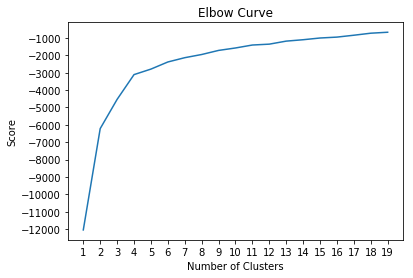

In [26]:
from sklearn.cluster import KMeans

X = RFM_DataFrame_Grades[['Recency Grade', 'Frequency Grade', 'Monetary Value Grade']]
number_of_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in number_of_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(number_of_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.locator_params(nbins=20)
plt.show()

Upon examination of the graph, it appears that 4 may be the optimal number of clusters for this dataset. It is not an obvious value, as the score does continue to increase fairly considerably as we add more clusters beyond 4. Another Elbow Curve is drawn below with a maximum number of clusters of 100.

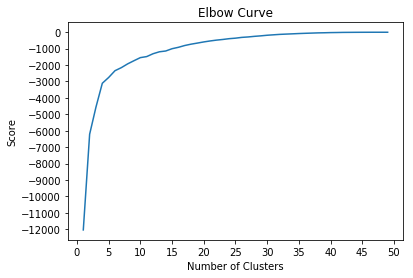

In [27]:
number_of_clusters2 = range(1, 50)
kmeans2 = [KMeans(n_clusters=i) for i in number_of_clusters2]
score2 = [kmeans2[i].fit(X).score(X) for i in range(len(kmeans2))]
plt.plot(number_of_clusters2,score2)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.locator_params(nbins=20)
plt.show()

This graph also seems to show that the rate increase in score begins to slow significantly after we surpass 4 clusters. Therefore, a model with 4 clusters will be used to segment the data.

However, an inuitive approach to the data may lead to a different conclusion. Since there are three features used in this model, and each feature has exactly four possible values, there are a total of 64 possible types of customers. Therefore, we know that 64 clusters will lead to a score of 0, and we will have a strong explicit definition for each cluster of customers. Therefore, a model with 64 clusters will also be constructed and evaluated. 

In [28]:
#KMeans model with 4 clusters
kmeans_four_clusters = KMeans(n_clusters= 4, init='k-means++', random_state=0).fit(X)
kmeans_four_clusters.labels_
kmeans_four_clusters.cluster_centers_

array([[1.91961415, 2.98177921, 3.32690247],
       [1.42329317, 2.30040161, 1.47389558],
       [3.35055866, 2.66061453, 1.55865922],
       [3.66699124, 3.76728335, 3.65141188]])

In [29]:
#Placing each customer into a cluster
predicted_clusters1 = kmeans_four_clusters.predict(X) # get clusters
RFM_DataFrame_Grades["Cluster (4 clusters)"] = predicted_clusters1
print(np.unique(predicted_clusters1, return_counts=True))

(array([0, 1, 2, 3], dtype=int32), array([ 933, 1245,  716, 1027]))


In [30]:
RFM_DataFrame_Grades.head()

,CustomerID,Recency Grade,Frequency Grade,Monetary Value Grade,Cluster (4 clusters)
0,12346,1,2,4,0
1,12747,4,4,4,3
2,12748,4,4,4,3
3,12749,4,4,3,3
4,12820,4,3,3,3


The four clusters can be described by the habits of the customers within each cluster:

Cluster 0 contains customers that haven't made a purchase recently, but they generally shop with average frequency and they spend more money than the average customer.

Cluster 1 contains customers that haven't made a purchase recently, shop with below average frequency, and spend less money than the average customer.

Cluster 2 contains customers that have recently made a purchase, shop with average frequency, but spend less money than the average customer.

Cluster 3 contains customers who have made a recent purchase, shop with a very high frequency, and spend much more money than the average customer. These are our top customers.

In [31]:
#KMeans model with 64 clusters
kmeans_64_clusters = KMeans(n_clusters= 64, init='k-means++', random_state=0).fit(X)
kmeans_64_clusters.labels_
kmeans_64_clusters.cluster_centers_[0:5]

array([[1., 3., 3.],
       [3., 4., 3.],
       [3., 3., 3.],
       [3., 3., 2.],
       [1., 3., 1.]])

In [32]:
#Placing each customer into a cluster
predicted_clusters2 = kmeans_64_clusters.predict(X) # get clusters
RFM_DataFrame_Grades["Cluster (64 clusters)"] = predicted_clusters2
print(np.unique(predicted_clusters2, return_counts=True))

(array([ 0,  1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 50, 51, 54, 56, 62], dtype=int32), array([ 92, 104, 164,  42, 194, 356,  38,  85, 181, 156, 178, 123, 115,
        95, 115, 126, 381,  61, 157,  53,  60,  51,  50,  47,  41,  37,
        45,  20,  24,  17,  16,  18,  13,  12,   9,   8,   7,   3,   3,
         2,   1,   1, 162,  74,  47, 128, 209]))


In [33]:
RFM_DataFrame_Grades.head()

,CustomerID,Recency Grade,Frequency Grade,Monetary Value Grade,Cluster (4 clusters),Cluster (64 clusters)
0,12346,1,2,4,0,28
1,12747,4,4,4,3,19
2,12748,4,4,4,3,19
3,12749,4,4,3,3,56
4,12820,4,3,3,3,18


Each cluster is represented exactly by a combination of 'Recency Grade', 'Frequency Grade', and 'Monetary Value Grade'. Cluster 0, for example, has centroids at [1, 3, 3]. Therefore we know this cluster represents customers that haven't made a purchase in a very long time, but they buy at above average frequency and spend an above-average amount of money.

The scores of each model are printed below:

In [34]:
four_cluster_score = kmeans_four_clusters.score(X)
sixtyfour_cluster_score = kmeans_64_clusters.score(X)
print('Four Cluster Model Score: {:.2f}'.format(four_cluster_score))
print('Sixty-Four Cluster Model Score: {:.2f}'.format(sixtyfour_cluster_score))

Four Cluster Model Score: -3161.70
Sixty-Four Cluster Model Score: -0.00


As expected, the sixty-four cluster model has a perfect score. Although the four cluster model doesn't create perfect clusters, the similarity of customers within a cluster is very high. In addition, the four cluster model will be much easier for a marketing team to handle. It would be extremely difficult and likely not worthwile for a marketing team to create a specialized plan for 64 types of customers. The difficulty is amplified by the fact that there is not much distinction between a lot of the clusters in the sixty-four cluster model. However, making a tailored strategy for four distinct, well-defined clusters is much more doable and can be much more effective as well. Therefore, the four cluster model is chosen to segment the customers.

Below is a sample of ten customers from each cluster:

In [35]:
RFM_DataFrame_Cluster = RFM_DataFrame_Grades.drop('Cluster (64 clusters)', axis = 1)
RFM_DataFrame_wo_Cluster = RFM_DataFrame_Cluster.drop('Cluster (4 clusters)', axis = 1)
for i in range(len(np.unique(predicted_clusters1))):
    print("\nCluster#",i)
    print(RFM_DataFrame_wo_Cluster[RFM_DataFrame_Cluster["Cluster (4 clusters)"]==i].head(10))
    print("\n") 


Cluster# 0
   CustomerID Recency Grade Frequency Grade Monetary Value Grade
0       12346             1               2                    4
7       12823             2               4                    4
12      12829             1               3                    3
22      12840             1               3                    4
25      12843             2               4                    3
27      12845             1               3                    4
32      12853             2               4                    4
33      12854             2               3                    4
36      12857             1               3                    3
37      12863             2               2                    4



Cluster# 1
   CustomerID Recency Grade Frequency Grade Monetary Value Grade
5       12821             1               2                    2
6       12822             2               3                    2
8       12824             2               2                    1

As expected, the customers in Cluster 0 haven't made a purchase in a while, but shop with around average to above-average frequency and spend more than the average customer. The customers in cluster 1 also haven't made a purchase in a while, but they shop with below-average to average frequency and spend much less than the average customer. Customers in Cluster 2 have shopped recently, and they shop with high frequency. However, these customers spend far below the average customer. Customers in Cluster 3 have shopped very recently, and they shop very frequently and spend much more than the average customer.

All of these charactersitics were expected, thus we can conclude that the model has segmented the customers successfully.

## Discussion

Every UK customer from this dataset has now been segmented based on his or her buying habits. These segments would then be sent to a marketing team, along with the descriptions for each cluster. From there, specialized offers, discounts, emails, etc. can be sent to each customer based on their cluster. For example, a marketing team may want to reach out to Cluster 3 with an email showing appreciation for being such loyal customers. Perhaps the marketing team should reach out to Clusters 0 and 1 with a discount offer to encourage these customers to visit the site again and make another purchase. Regardless of the marketing strategy, it is clear that these segments will help the marketing team execute their strategy more effectively.

While this segmentation provides a lot of value, it admittedly does not maximize the amount of value that could be obtained from this dataset. About 10% of the company's customers are located outside of the United Kingdom. Since this segmentation focused only on domestic customers, these 10% of customers were not placed in a cluster. Therefore, the marketing team does not have any insight for how to approach these customers. Also, the actual item purchased in each transaction was included in the dataset, but it was not used for this analysis. If a model was created that included the type of items we expect each customer to see, the marketing team would be able to send even more personalized offers to each customer.


## Conclusion

A dataset from UCI Machine Learning Repository was cleaned and examined. After deciding upon an RFM analysis, three new features were generated to allow the categorization of a customer based on his or her most recent purchase date, how often he or she places an order, and how much he or she spends when shopping. Upon creation of these features, it was found that Kmeans clustering was failing to generate meaningful clusters due to extreme outliers. Therefore, three new features were generated that gave each customer three 'grades' between 1 and 4 based on the three factors of RFM. These grades were then used to train a KMeans algorithm with four clusters (determined using an Elbow Curve) and then all of the customers were placed into a cluster. The centroids of each cluster were examined to determine the characteristics of the customers placed in each cluster. This data would theoretically be passed along to a marketing team to allow them to execute an effective strategy to increase customer retention, engagement, and money spent.